# Proyecto módulo 3

En este notebook te vamos a proponer tres sets de datos para que puedas desarrollar un pequeño proyecto asociado al módulo 3 utilizando los distintos modelos que hemos ido viendo a lo largo del módulo. 

Escoge alguno de los tres sets y utiliza todas las herramientas que has visto en el módulo y en los módulos previos para crear un modelo que resuelva el problema asociado a cada set de datos. 

## Precio de los aguacates [dataset](https://www.kaggle.com/datasets/neuromusic/avocado-prices)

Este set de datos nos permite ver la evolución a lo largo del tiempo del precio de los aguacates en distintos mercados de EEUU y es perfecto para la realización de un análisis de series temporales que ayuden a predecir la evolución de los precios de este alimento

Source and help: [DATA SCIENCE](https://salcorpenterprise.com/time-series-analysis-with-avocados/)


In [ ]:
import pandas as pd
import numpy as np
 
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
 
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Copia de avocado.csv', index_col=0)

Paletas de colores para el dataset

In [ ]:
import seaborn as sns

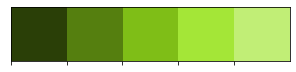

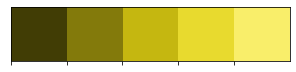

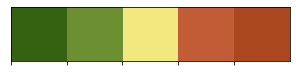

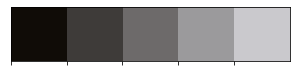

In [ ]:
# List of color
olive_grad = ['#2A3F07', '#557F0F', '#7FBE17', '#A4E637', '#C1EE76']
yellow_grad = ['#413D05', '#837A0B', '#C5B710', '#E8DA2E', '#F9EE6A']
color_mix = ['#356211', '#6C8F32', '#F2E880', '#C15C37', '#AA471F']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# Color palette
sns.palplot(olive_grad)
sns.palplot(yellow_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

## Exploratory Data Analysis
Let's have a look at our data

In [ ]:
df.head().style.background_gradient(cmap='Greens').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2015-12-27,1.330000,64236.620000,1036.740000,54454.850000,48.160000,8696.870000,8603.620000,93.250000,0.000000,conventional,2015,Albany
2015-12-20,1.350000,54876.980000,674.280000,44638.810000,58.330000,9505.560000,9408.070000,97.490000,0.000000,conventional,2015,Albany
2015-12-13,0.930000,118220.220000,794.700000,109149.670000,130.500000,8145.350000,8042.210000,103.140000,0.000000,conventional,2015,Albany
2015-12-06,1.080000,78992.150000,1132.000000,71976.410000,72.580000,5811.160000,5677.400000,133.760000,0.000000,conventional,2015,Albany
2015-11-29,1.280000,51039.600000,941.480000,43838.390000,75.780000,6183.950000,5986.260000,197.690000,0.000000,conventional,2015,Albany


In [ ]:
# Amount of information
df.shape

(18249, 13)

In [ ]:
# Types of columns
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [ ]:
# Content of columns
display(df.dtypes)

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

We observe that the variable Date is written as an object where it should be a date. Let's change this!

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
display(df.Date.dtypes)

dtype('<M8[ns]')

We want to sort the dataset from oldest to newest. We do this by the following code:

In [ ]:
df.set_index('Date', inplace=True)
df= df.sort_index()

In [ ]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [ ]:
# Let's get the amount of missing data:
missing_data = df.isnull().sum(axis = 0)
missing_data = missing_data[missing_data > 0]
percentage_missing = missing_data / df.shape[0]*100
df_missing = pd.DataFrame()
df_missing["Count (n)"] = missing_data
df_missing["Percentage (%)"] = percentage_missing
print(df_missing.sort_values(by = "Count (n)", ascending = False))

Empty DataFrame
Columns: [Count (n), Percentage (%)]
Index: []


There is no missing data!

### Types of avocado

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  


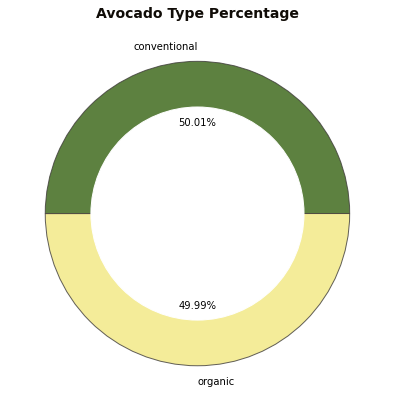

In [ ]:
# Plot elements
colors = [color_mix[0], color_mix[2]]
labels = df['type'].unique()
order = df['type'].value_counts().index
# Figure Size
plt.figure(figsize=(7, 7))

# Pie chart
#plt.subplot(1, 2, 1)
plt.title('Avocado Type Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', 
          color = black_grad[0])
plt.pie(df['type'].value_counts(), labels = order, colors = colors, 
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%')
circle = plt.Circle( (0,0), 0.7, color='white', edgecolor = "black")
p = plt.gcf()
p.gca().add_artist(circle)
plt.show()

## ARIMA
We are going to use the ARIMA model in order to predict the prices of avocados. <br>
ARIMA stands for Auto Regressive Integrated Moving Average. <br>
It is a class of models that forecasts using own past values: lag values and lagged forecast errors.
* AR model uses lag values to forecast
* MA model uses lagged forecast errors to forecast
* Two models Integrated becomes ARIMA (“I” stands for Integrated)
* Consists of three parameters: p, q, d

In [ ]:
# I plot the average prices for conventional avocados and for organic
conventional = df[(df.region == 'TotalUS')&(df.type == 'conventional')]
conventional = conventional.drop(columns = ['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'])
organic = df[(df.region == 'TotalUS')&(df.type == 'organic')]
organic = organic.drop(columns = ['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'])

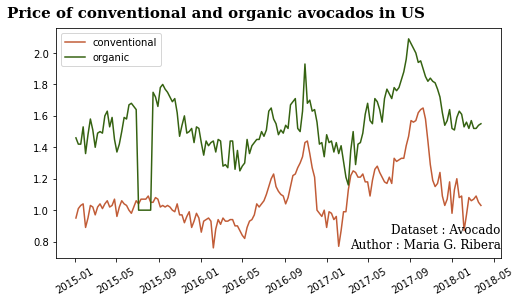

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
plt.plot(conventional,color = color_mix[3], label = "conventional")
plt.plot(organic, color = color_mix[0], label = "organic")
#plt.title('')
#ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
plt.xticks(rotation = 30)
fig.text(0.8, 1, 'Price of conventional and organic avocados in US', fontweight='bold', fontfamily='serif', fontsize=15, ha='right')    
fig.text(0.95, 0.2, 'Dataset : Avocado\nAuthor : Maria G. Ribera', fontweight='light', fontfamily='serif', fontsize=12, ha='right')  
plt.legend()
plt.tight_layout()




* Trend : Upward, downward, or stationary. Can we talk about this?
* Seaonality: Repeating pattern in certain period. Ex: difference between summer and winter. Also includes special holidays
* Irregularity: External factors that affect time series data such as Covid, natural disasters.
* Cyclic: repeating up and down time series data.

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error

In [ ]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings

## Model Evaluation

In [ ]:
# To install the library
!pip install pmdarima
  
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to Avocado dataset
stepwise_fit = auto_arima(conventional, start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 13.9 MB/s 
     |████████████████████████████████| 9.8 MB 56.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.57 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-35.006, Time=0.09 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-336.781, Time=1.68 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.18 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-36.926, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-303.080, Time=0.15 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-346.479, Time=4.71 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.78 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.39 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=-62.278, Time=1.00 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=-344.883, Time=4.22 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=-344.830, Time=3.40 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=-204.460, Time=2.66 sec
 ARIMA(2,0,1)(2,1,0)[12] intercept   : AIC=-349.133, Time=6.59 sec
 ARIMA(2,0,1)(1,1,0)[12] intercept   : AIC

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  169
Model:             SARIMAX(2, 0, 1)x(2, 1, 0, 12)   Log Likelihood                 181.553
Date:                            Fri, 22 Jul 2022   AIC                           -351.106
Time:                                    15:00:45   BIC                           -332.769
Sample:                                         0   HQIC                          -343.659
                                            - 169                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0470      0.066      0.711      0.477      -0.083       0.177
ar.L2          0.7994      0.067     12.015      0.000       0.669       0.930
ma.L1          0.9834      0.034     29.090      0.000       0.917       1.050
ar.S.L12      -0.6078      0.091     -6.693      0.000      -0.786      -0.430
ar.S.L24      -0.2829      0.095     -2.967      0.003      -0.470      -0.096
sigma2         0.0055      0.001      9.347      0.000       0.004       0.007
===================================================================================
Ljung-Box (Q):                       42.30   Jarque-Bera (JB):                15.27
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               2.68   Skew:                            -0.54
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Parameters
* p — order of AR term

Number of lags of Y to be used as predictors. In other words, If you are trying to predict June’s sale how many previous(lag) month’s data are you going to use?<br>
* d — Minimum differencing period

Minimum number of differencing needed to make time series data stationary.
Already stationary data would have d = 0. <br>
* q — order of MA term

Number of lagged forecast errors -> how many past forecast errors will you use?<br>



In [ ]:
# evaluate parameters
p_values = range(0, 4)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(conventional.values, p_values, d_values, q_values)

Best ARIMA(1, 0, 0) MSE=0.007


## ARIMA

In [ ]:
# instantiate the ARIMA model
model = ARIMA(conventional['AveragePrice'], order = (1, 0, 0))
 
# fit the model
results_ARIMA = model.fit()
 
# collect the predicted results, rounding to two to indicate dollars and cents
predictions = round(results_ARIMA.predict(), 2)
 
# put the predictions into a DataFrame with Date and Predicted Price columns
preds = pd.DataFrame(list(zip(list(predictions.index),list(predictions))),columns=['Date',
'PredictedPrice']).set_index('Date')
 
# combine the original data set with the predicted data
predicted_df = pd.merge(conventional[1:], preds, left_index=True, right_index=True)

In [ ]:
print("\tMean Squared Error:", mean_squared_error(predicted_df['AveragePrice'], predicted_df['PredictedPrice']))
print("\tRoot Mean Squared Error:", np.sqrt(mean_squared_error(predicted_df['AveragePrice'],
predicted_df['PredictedPrice'])))

	Mean Squared Error: 0.004301785714285715
	Root Mean Squared Error: 0.06558799977347773


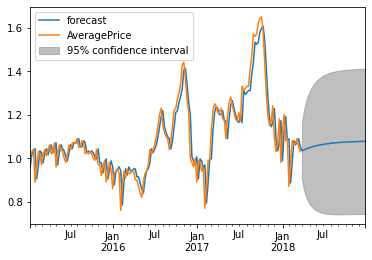

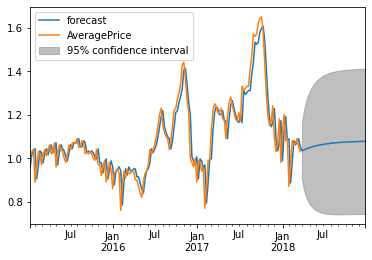

In [ ]:
results_ARIMA.plot_predict(start='2015-01-11', end = '2018-12-30')

In [ ]:
# grab the forecast from the model out 40 steps to 2018-12-30, and create a Series out of the data
ARIMA_forecast = pd.Series(results_ARIMA.forecast(steps = 40)[0])
 
# create an index from the end of the data out to the length of the forecast on a weekly basis
idx = pd.date_range('2018-04-01', '2018-12-30', freq='W')
 
# create a DataFrame combining the index above and the forecast prices
ARIMA_forecast = pd.DataFrame(list(zip(list(idx),list(ARIMA_forecast))),columns=['Date','ForecastPrice']).set_index('Date')

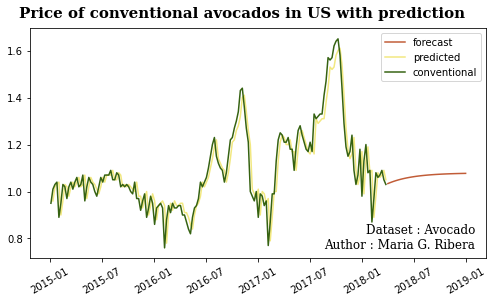

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
plt.plot(ARIMA_forecast,color = color_mix[3], label = "forecast")
# predicted_df['PredictedPrice']
plt.plot(predicted_df['PredictedPrice'],color = color_mix[2], label = "predicted")
plt.plot(conventional, color = color_mix[0], label = "conventional")
#plt.title('')
#ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
plt.xticks(rotation = 30)
fig.text(0.93, 1, 'Price of conventional avocados in US with prediction', fontweight='bold', fontfamily='serif', fontsize=15, ha='right')    
fig.text(0.95, 0.2, 'Dataset : Avocado\nAuthor : Maria G. Ribera', fontweight='light', fontfamily='serif', fontsize=12, ha='right')  
plt.legend()
plt.tight_layout()

The forecast does not show any variation. This is weird.

## SARIMAX

In [ ]:
# instantiate the model using the ARIMA order we had earlier
mod = sm.tsa.statespace.SARIMAX(conventional['AveragePrice'], order=(2, 0, 1), seasonal_order=(2, 1, 0, 12), enforce_stationarity=False, enforce_invertibility=False)
 
# fit the model
SARIMAX_results = mod.fit()
 
# store the predictions from the model rounding to two for dollars and cents
SARIMAX_predictions = round(SARIMAX_results.predict(), 2)
 
# create a DataFrame with Date and Predicted Price
SARIMAX_preds = pd.DataFrame(list(zip(list(SARIMAX_predictions.index),list(SARIMAX_predictions))), columns=['Date','PredictedPrice']).set_index('Date')
 
# merge the original DataFrame with the predictions
SARIMAX_predicted_df = pd.merge(conventional[1:], SARIMAX_preds, left_index=True, right_index=True)

In [ ]:
print("\tMean Squared Error:", mean_squared_error(SARIMAX_predicted_df['AveragePrice'], SARIMAX_predicted_df['PredictedPrice']))
print("\tRoot Mean Squared Error:", np.sqrt(mean_squared_error(SARIMAX_predicted_df['AveragePrice'], SARIMAX_predicted_df['PredictedPrice'])))

	Mean Squared Error: 0.011085714285714289
	Root Mean Squared Error: 0.1052887187010759


In [ ]:
SARIMAX_forecast = pd.DataFrame(round(SARIMAX_results.forecast(steps = 40), 2), columns = ['Forecasted Price'])

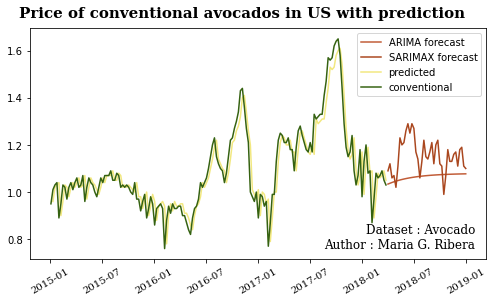

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
plt.plot(ARIMA_forecast,color = color_mix[3], label = "ARIMA forecast")
plt.plot(SARIMAX_forecast,color = color_mix[4], label = "SARIMAX forecast")

# predicted_df['PredictedPrice']
plt.plot(predicted_df['PredictedPrice'],color = color_mix[2], label = "predicted")
plt.plot(conventional, color = color_mix[0], label = "conventional")
#plt.title('')
#ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
plt.xticks(rotation = 30, fontfamily= "serif")
fig.text(0.93, 1, 'Price of conventional avocados in US with prediction', fontweight='bold', fontfamily='serif', fontsize=15, ha='right')    
fig.text(0.95, 0.2, 'Dataset : Avocado\nAuthor : Maria G. Ribera', fontweight='light', fontfamily='serif', fontsize=12, ha='right')  
plt.legend()
plt.tight_layout()

## Trials

In [ ]:
# Vamos a comprobar si la serie temporal es estacionaria utilizando una métrica estadística llamada test de Dickey-Fuller
# que vamos a calcular con la libreria adfuller que hemos importado

def test_stationarity(timeseries):
    # Determining rolling statistics
    rol_mean = timeseries.rolling(window=12, center=False).mean()
    rol_std = timeseries.rolling(window=12, center=False).std()
    
    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='b', label='Original')
    mean = plt.plot(rol_mean, color='r', label='Media acumulada')
    std = plt.plot(rol_std, color='black', label='Desviación típica acumulada')
    plt.legend(loc='best')
    plt.title('Media y desviación típica acumuladas')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Resultados del test Dickey-Fuller:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value',
                                             '#Lags Usados',
                                             'Número de observaciones usadas'])
    for key,value in dftest[4].items():
        dfoutput['Valor crítico (%s)'%key] = value
    print(dfoutput)

In [ ]:
test_stationarity(conventional)

The stationarity test gives inconclusive results

In [ ]:
# El primer paso va a ser intentar eliminar la tendencia de nuestros datos
# restando la desviación típica de los datos, que vamos a calcular utilizando la función rolling 
# de pandas

desviacion_tipica = conventional.rolling(window=12,center=False).mean()
plt.plot(conventional)
plt.plot(desviacion_tipica, color='r')

In [ ]:
# como hemos utilizado una ventana de 12 valores, no tenemos desviación típica para los
# primeros 11 valores y al restarle la desviación típica perderemos esos valores
diferencia = conventional - desviacion_tipica
diferencia.dropna(inplace=True)

In [ ]:
# Vamos a ver el resultado de nuestro test estadístico en nuestros datos transformados
test_stationarity(diferencia)

In [ ]:
hiperparametros = (2,1,2)
modelo_no_estacionario = ARIMA(diferencia, order=hiperparametros)
resultados_no_estacionario = modelo_no_estacionario.fit()

In [ ]:
# Vamos a crear un modelo ARIMA con los datos tal y como están
# Definimos los hiperparámetros para el modelo como hemos discutido antes (p,q,d)
hiperparametros = (2,1,2)
modelo = ARIMA(conventional,order=hiperparametros)
resultados = modelo.fit()

In [ ]:
print(resultados)

In [ ]:
# Separación datos train-test
# ==============================================================================
steps = int(conventional.shape[0]*0.33)
datos_train = conventional[:-steps]
datos_test  = conventional[-steps:]

print(f"Fechas train : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

fig, ax = plt.subplots(figsize=(9, 4))
datos_train['AveragePrice'].plot(ax=ax, label='train')
datos_test['AveragePrice'].plot(ax=ax, label='test')
ax.legend();

In [ ]:
# Crear y entrenar forecaster
# ==============================================================================
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 55
             )

forecaster.fit(y=datos_train['AveragePrice'])
forecaster

In [ ]:
# Predicciones
# ==============================================================================
steps = int(conventional.shape[0]*0.33)
predicciones = forecaster.predict(steps=steps)
index_values = datos_test.index.values
predicciones = predicciones.to_frame()
predicciones = predicciones.set_index(index_values)

In [ ]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(9, 4))
datos_train['AveragePrice'].plot(ax=ax, label='train') 
datos_test['AveragePrice'].plot(ax=ax, label='test')
predicciones.plot(ax=ax, label="predicciones")
ax.legend();

In [ ]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    error = mean_squared_error(test, predictions)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(dataset, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
 
# evaluate parameters
p_values = range(0, 4)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(conventional.values, p_values, d_values, q_values)

In [ ]:
# instantiate the ARIMA model
model = ARIMA(conventional['AveragePrice'], order = (1, 0, 0))
 
# fit the model
results_ARIMA = model.fit()
 
# collect the predicted results, rounding to two to indicate dollars and cents
predictions = round(results_ARIMA.predict(), 2)
 
# put the predictions into a DataFrame with Date and Predicted Price columns
preds = pd.DataFrame(list(zip(list(predictions.index),list(predictions))),columns=['Date',
'PredictedPrice']).set_index('Date')
 
# combine the original data set with the predicted data
predicted_df = pd.merge(conventional[1:], preds, left_index=True, right_index=True)


In [ ]:
print("\tMean Squared Error:", mean_squared_error(predicted_df['AveragePrice'], predicted_df['PredictedPrice']))
print("\tRoot Mean Squared Error:", np.sqrt(mean_squared_error(predicted_df['AveragePrice'],
predicted_df['PredictedPrice'])))

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
